# Ensemble 앙상블

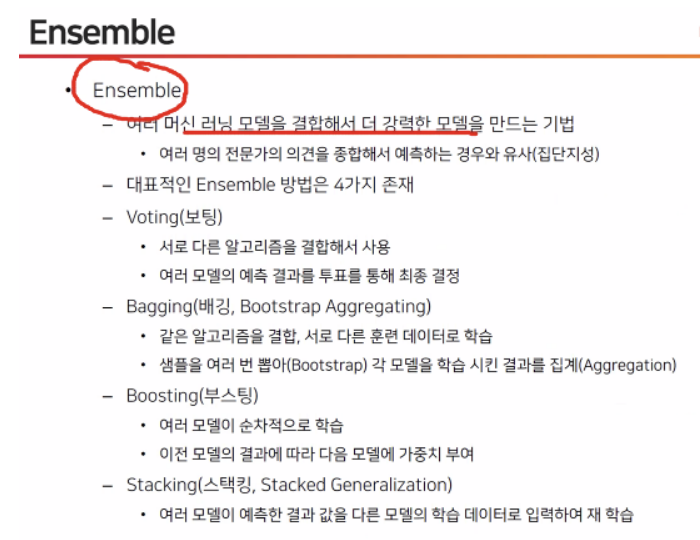

## Voing

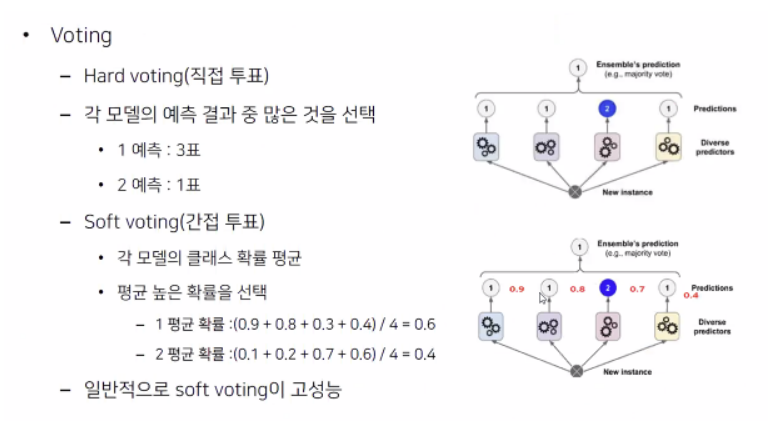

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

y = cancer["target"]
X = cancer["data"]

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state=0, stratify=y
)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
dt3 = DecisionTreeClassifier(max_depth=3)
dt5 = DecisionTreeClassifier(max_depth=5)

In [12]:
from sklearn.ensemble import VotingClassifier
hard = VotingClassifier([
    ('knn3',knn3),('knn5',knn5),('lr',lr),('dt3',dt3),('dt5',dt5)
])

soft = VotingClassifier([
    ('knn3',knn3),('knn5',knn5),('lr',lr),('dt3',dt3),('dt5',dt5)],
    voting = 'soft'
)

In [11]:
names = ['hard', 'soft', 'knn3', 'knn5', 'lr', 'dt3', 'dt5']

for idx,model in enumerate([hard, soft, knn3, knn5, lr, dt3, dt5]) :
    model.fit(x_tr,y_tr)
    name = names[idx]
    tr_sc = model.score(x_tr, y_tr)
    te_sc = model.score(x_te, y_te)
    print(f'{name} Train Accuracy : {tr_sc:.2f}%')
    print(f'{name} Test Accuracy : {te_sc:.2f}%')
    print()

hard Train Accuracy : 0.98%
hard Test Accuracy : 0.95%

soft Train Accuracy : 1.00%
soft Test Accuracy : 0.96%

knn3 Train Accuracy : 0.96%
knn3 Test Accuracy : 0.92%

knn5 Train Accuracy : 0.95%
knn5 Test Accuracy : 0.92%

lr Train Accuracy : 0.97%
lr Test Accuracy : 0.94%

dt3 Train Accuracy : 0.98%
dt3 Test Accuracy : 0.93%

dt5 Train Accuracy : 1.00%
dt5 Test Accuracy : 0.93%



## Bagging

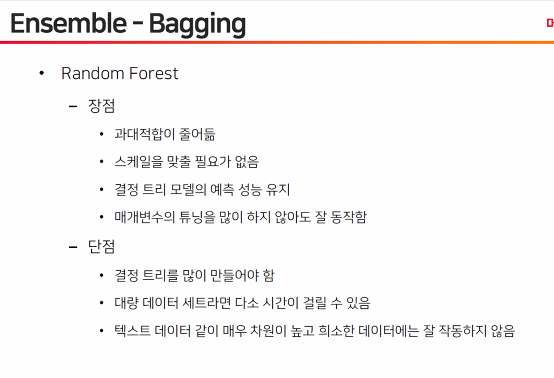

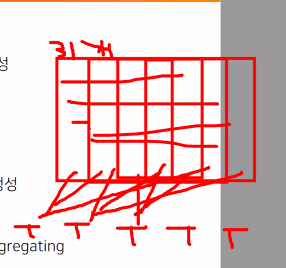

### 하이퍼파라미터 
- 성능에 영향을 미치는 파라미터를 하이퍼파라미터
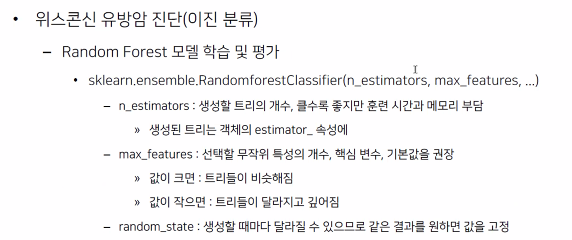

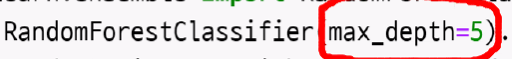
- tree계열들은 max_depth 파라미터를 무조건 가지고 있음
- 앙상블 종류 4가지도 max_depth 가지고있음
- 5, 4, 3 정도로 줄여서 성능비교..?

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5).fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(1.0, 0.951048951048951)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4).fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.9953051643192489, 0.9440559440559441)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3).fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.9812206572769953, 0.9370629370629371)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2).fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.9647887323943662, 0.9230769230769231)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=1).fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.931924882629108, 0.9300699300699301)

## Boosting

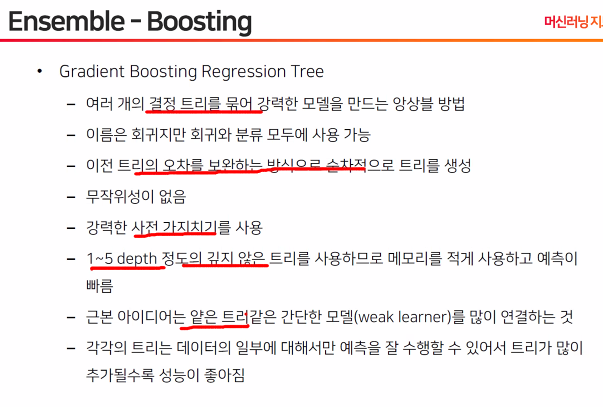

### 하이퍼파라미터

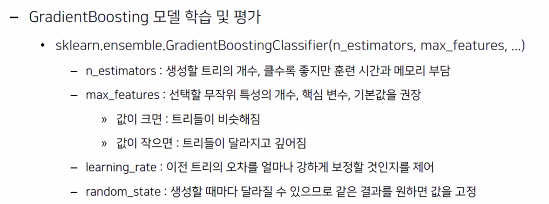

In [20]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier()),
              ('gb', GradientBoostingClassifier())]

model = StackingClassifier(estimators=estimators,
                           final_estimator=LogisticRegression()).fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(1.0, 0.965034965034965)

## Stacking

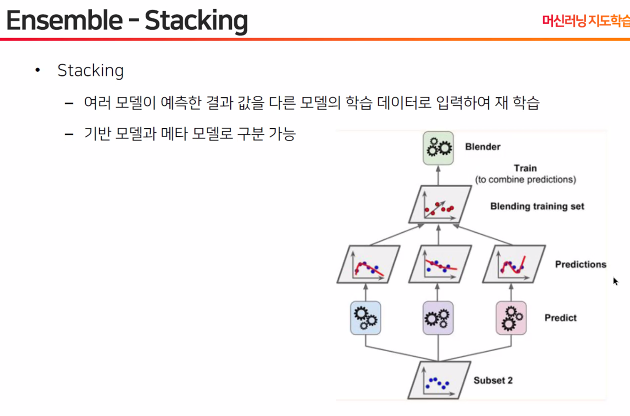

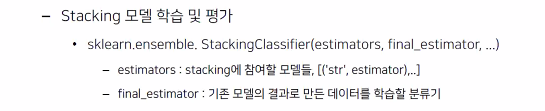

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

## self-study- classification
- 학습데이터 70%, 평가 데이터 30%
- knn, logistic, decision, ensemble

In [23]:
# 데이터 세트 준비
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [55]:
from sklearn.datasets import load_digits
digits = load_digits()
best_model = {}

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

# 모델 설정
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
dt3 = DecisionTreeClassifier(max_depth=3)
dt5 = DecisionTreeClassifier(max_depth=5)

# voting
from sklearn.ensemble import VotingClassifier
hard = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr), ('dt3', dt3), ('dt5', dt5)])

soft = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr), ('dt3', dt3), ('dt5', dt5)], voting='soft')

names = ['hard', 'soft', 'knn1', 'knn2', 'lr', 'dt3', 'dt5']
for idx, model in enumerate([hard, soft, knn1, knn2, lr, dt3, dt5]):
    model.fit(x_tr, y_tr)
    name = names[idx]
    train_score = model.score(x_tr, y_tr) * 100
    test_score = model.score(x_te, y_te) * 100
    best_model[name] = [test_score]
    
# bagging
for i in range(1, 6):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(max_depth=i).fit(x_tr, y_tr)
    best_model[f'bagging, max_depth={i}'] = [model.score(x_te, y_te)]
    
# boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(x_tr, y_tr)
best_model['boosting'] = [model.score(x_te, y_te)]

# stacking
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier()),
             ('gb', GradientBoostingClassifier())]

model = StackingClassifier(estimators=estimators,
                          final_estimator=LogisticRegression())

best_model['stacking'] = [model.fit(x_tr, y_tr).score(x_te, y_te)]

# 최댓값 저장 후 출력
max_value = max(best_model.values())

# for key, value in best_model.items():
#     if value == max_value:
#         print(f'가장 좋은 모델은 {key}, 성능은 {value:.2f}%')

In [58]:
import pandas as pd
best_model_df = pd.DataFrame(best_model).T
print(best_model_df)
best_model_df.sort_values(0, ascending=False).reset_index()

                              0
hard                  98.222222
soft                  97.777778
knn1                  98.000000
knn2                  98.666667
lr                    96.444444
dt3                   46.888889
dt5                   67.555556
bagging, max_depth=1   0.775556
bagging, max_depth=2   0.820000
bagging, max_depth=3   0.860000
bagging, max_depth=4   0.924444
bagging, max_depth=5   0.940000
boosting               0.964444
stacking               0.977778


,index,0
0,knn2,98.666667
1,hard,98.222222
2,knn1,98.000000
3,soft,97.777778
4,lr,96.444444
5,dt5,67.555556
6,dt3,46.888889
7,stacking,0.977778
8,boosting,0.964444
9,"bagging, max_depth=5",0.940000


In [62]:
print("제일 좋은 성능의 모델은", 
      best_model_df.sort_values(0, ascending=False).reset_index().iloc[0,0],
     "입니다")

제일 좋은 성능의 모델은 knn2 입니다


In [63]:
print("제일 좋은 성능의 모델은", 
      best_model_df.sort_values(0, ascending=False).reset_index().loc[0,'index'],
     "입니다")

제일 좋은 성능의 모델은 knn2 입니다


### 103페이지 문제풀기

In [64]:
from sklearn.datasets import load_digits
digits = load_digits()
# 모델이름을 키로 성능점수를 저장한다
# 나중에 데이터프레임으로 저장하기위해 사전타입에 저장한다.
# 성능점수를 배열로 저장해야 데이터프레임으로 변환이 가능하다.
best_model = {}  

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

# 모델 설정
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
dt3 = DecisionTreeClassifier(max_depth=3)
dt5 = DecisionTreeClassifier(max_depth=5)

# voting
from sklearn.ensemble import VotingClassifier
hard = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr), ('dt3', dt3), ('dt5', dt5)])

soft = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr', lr), ('dt3', dt3), ('dt5', dt5)], voting='soft')

names = ['hard', 'soft', 'knn1', 'knn2', 'lr', 'dt3', 'dt5']
for idx, model in enumerate([hard, soft, knn1, knn2, lr, dt3, dt5]):
    model.fit(x_tr, y_tr)
    name = names[idx]
    train_score = model.score(x_tr, y_tr) * 100
    test_score = model.score(x_te, y_te) * 100
    best_model[name] = [test_score] # 성능점수를 배열로 저장한다
    
# bagging
for i in range(1, 6):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(max_depth=i).fit(x_tr, y_tr)
    best_model[f'bagging, max_depth={i}'] = [model.score(x_te, y_te)] # 성능점수를 배열로 저장한다
    
# boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier().fit(x_tr, y_tr)
best_model['boosting'] = [model.score(x_te, y_te)] # 성능점수를 배열로 저장한다

# stacking
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier()),
             ('gb', GradientBoostingClassifier())]

model = StackingClassifier(estimators=estimators,
                          final_estimator=LogisticRegression())

best_model['stacking'] = [model.fit(x_tr, y_tr).score(x_te, y_te)] # 성능점수를 배열로 저장한다

import pandas as pd
pd.DataFrame(best_model) # 가로로 긴 모양이 생성된다. 정렬하려면 세로로 길어야한다.
best_model_df = pd.DataFrame(best_model).T # 가로를 세로로 변환한다.
print(best_model_df)
#0 칼럼기준 내림차순 정렬. 접근이 쉽도록 인덱스를 일반칼럼으로 변환하고 인덱스는 숫자로 새로 만들어준다.
print(best_model_df.sort_values(0, ascending=False).reset_index()) 
# 맨 첫번째 행, "index"칼럼이 가장 성능좋은 모델이름이다.
best_model_df.sort_values(0, ascending=False).reset_index().loc[0,"index"]

                              0
hard                  98.222222
soft                  97.777778
knn1                  98.000000
knn2                  98.666667
lr                    96.444444
dt3                   46.888889
dt5                   67.555556
bagging, max_depth=1   0.744444
bagging, max_depth=2   0.820000
bagging, max_depth=3   0.875556
bagging, max_depth=4   0.917778
bagging, max_depth=5   0.955556
boosting               0.966667
stacking               0.973333
                   index          0
0                   knn2  98.666667
1                   hard  98.222222
2                   knn1  98.000000
3                   soft  97.777778
4                     lr  96.444444
5                    dt5  67.555556
6                    dt3  46.888889
7               stacking   0.973333
8               boosting   0.966667
9   bagging, max_depth=5   0.955556
10  bagging, max_depth=4   0.917778
11  bagging, max_depth=3   0.875556
12  bagging, max_depth=2   0.820000
13  bagging, max

'knn2'